In [1]:
import pandas as pd
import pickle
from PIL import Image
import numpy as np
import os
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import shelve
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pickle5 as pickle
import scipy.io
from scipy.stats import sem
import dataframe_image as dfi

In [2]:
## VIB_DenseNet UNSUP model
UNSUP_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind4.pkl', "rb"))
UNSUP_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind5.pkl', "rb"))
UNSUP_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind6.pkl', "rb"))
UNSUP_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind4_mean.pkl', "rb"))
UNSUP_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind5_mean.pkl', "rb"))
UNSUP_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind6_mean.pkl', "rb"))
UNSUP_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind4_sem.pkl', "rb"))
UNSUP_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind5_sem.pkl', "rb"))
UNSUP_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/kendalltaus/UNSUP_tau_wind6_sem.pkl', "rb"))
# RDMs for KDEF A & B
UNSUP_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
v_UNSUP_RDM_A = UNSUP_RDM_value_A[np.triu_indices(UNSUP_RDM_value_A.shape[0], 1)]
UNSUP_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
v_UNSUP_RDM_B = UNSUP_RDM_value_B[np.triu_indices(UNSUP_RDM_value_B.shape[0], 1)]

## VIB_DenseNet RL model
RL_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind4.pkl', "rb"))
RL_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind5.pkl', "rb"))
RL_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind6.pkl', "rb"))
RL_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind4_mean.pkl', "rb"))
RL_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind5_mean.pkl', "rb"))
RL_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind6_mean.pkl', "rb"))
RL_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind4_sem.pkl', "rb"))
RL_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind5_sem.pkl', "rb"))
RL_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/kendalltaus/RL_tau_wind6_sem.pkl', "rb"))
# RDMs for KDEF A & B
RL_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
v_RL_RDM_A = RL_RDM_value_A[np.triu_indices(RL_RDM_value_A.shape[0], 1)]
RL_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
v_RL_RDM_B = RL_RDM_value_B[np.triu_indices(RL_RDM_value_B.shape[0], 1)]

## VIB_DenseNet UNSUP+RL model
UNSUP_RL_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind4.pkl', "rb"))
UNSUP_RL_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind5.pkl', "rb"))
UNSUP_RL_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind6.pkl', "rb"))
UNSUP_RL_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind4_mean.pkl', "rb"))
UNSUP_RL_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind5_mean.pkl', "rb"))
UNSUP_RL_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind6_mean.pkl', "rb"))
UNSUP_RL_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind4_sem.pkl', "rb"))
UNSUP_RL_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind5_sem.pkl', "rb"))
UNSUP_RL_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/kendalltaus/UNSUP_RL_tau_wind6_sem.pkl', "rb"))
# RDMs for KDEF A & B
UNSUP_RL_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
v_UNSUP_RL_RDM_A = UNSUP_RL_RDM_value_A[np.triu_indices(UNSUP_RL_RDM_value_A.shape[0], 1)]
UNSUP_RL_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP+RL/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
v_UNSUP_RL_RDM_B = UNSUP_RL_RDM_value_B[np.triu_indices(UNSUP_RL_RDM_value_B.shape[0], 1)]

## VIB_DenseNet SUP model
SUP_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind4.pkl', "rb"))
SUP_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind5.pkl', "rb"))
SUP_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind6.pkl', "rb"))
SUP_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind4_mean.pkl', "rb"))
SUP_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind5_mean.pkl', "rb"))
SUP_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind6_mean.pkl', "rb"))
SUP_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind4_sem.pkl', "rb"))
SUP_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind5_sem.pkl', "rb"))
SUP_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/kendalltaus/SUP_tau_wind6_sem.pkl', "rb"))
# RDMs for KDEF A & B
SUP_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
v_SUP_RDM_A = SUP_RDM_value_A[np.triu_indices(SUP_RDM_value_A.shape[0], 1)]
SUP_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
v_SUP_RDM_B = SUP_RDM_value_B[np.triu_indices(SUP_RDM_value_B.shape[0], 1)]

## ResNet SUP model
RGB_ResID_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind4.pkl', "rb"))
RGB_ResID_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind5.pkl', "rb"))
RGB_ResID_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind6.pkl', "rb"))
RGB_ResID_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind4_mean.pkl', "rb"))
RGB_ResID_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind5_mean.pkl', "rb"))
RGB_ResID_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind6_mean.pkl', "rb"))
RGB_ResID_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind4_sem.pkl', "rb"))
RGB_ResID_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind5_sem.pkl', "rb"))
RGB_ResID_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/kendalltaus/RGB_ResID_tau_wind6_sem.pkl', "rb"))
# RDMs for KDEF A & B
RGB_ResID_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
v_RGB_ResID_RDM_A = RGB_ResID_RDM_value_A[np.triu_indices(RGB_ResID_RDM_value_A.shape[0], 1)]
RGB_ResID_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
v_RGB_ResID_RDM_B = RGB_ResID_RDM_value_B[np.triu_indices(RGB_ResID_RDM_value_B.shape[0], 1)]

## ResNet RL model
ResRL_layer4_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind4.pkl', "rb"))
ResRL_layer4_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind5.pkl', "rb"))
ResRL_layer4_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind6.pkl', "rb"))
ResRL_layer4_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind4_mean.pkl', "rb"))
ResRL_layer4_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind5_mean.pkl', "rb"))
ResRL_layer4_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind6_mean.pkl', "rb"))
ResRL_layer4_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind4_sem.pkl', "rb"))
ResRL_layer4_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind5_sem.pkl', "rb"))
ResRL_layer4_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_kendalltaus/ResRL_tau_wind6_sem.pkl', "rb"))
# RDMs KDEF A & B
ResRL_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_RDM_value_A.pkl',"rb"))
v_ResRL_RDM_A = ResRL_RDM_value_A[np.triu_indices(ResRL_RDM_value_A.shape[0], 1)]
ResRL_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_RDM_value_B.pkl',"rb"))
v_ResRL_RDM_B = ResRL_RDM_value_B[np.triu_indices(ResRL_RDM_value_B.shape[0], 1)]

## ResNet UNSUP model
ResUNSUP_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind4.pkl', "rb"))
ResUNSUP_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind5.pkl', "rb"))
ResUNSUP_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind6.pkl', "rb"))
ResUNSUP_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind4_mean.pkl', "rb"))
ResUNSUP_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind5_mean.pkl', "rb"))
ResUNSUP_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind6_mean.pkl', "rb"))
ResUNSUP_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind4_sem.pkl', "rb"))
ResUNSUP_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind5_sem.pkl', "rb"))
ResUNSUP_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/kendalltaus/ResNet_UNSUP_tau_wind6_sem.pkl', "rb"))
# RDMs KDEF A & B
ResUNSUP_RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb"))
v_ResUNSUP_RDM_A = ResUNSUP_RDM_value_A[np.triu_indices(ResUNSUP_RDM_value_A.shape[0], 1)]
ResUNSUP_RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/RDM_value_B.pkl',"rb"))
v_ResUNSUP_RDM_B = ResUNSUP_RDM_value_B[np.triu_indices(ResUNSUP_RDM_value_B.shape[0], 1)]

## KDEF pixel value
KDEF_tau_wind4 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind4.pkl', "rb"))
KDEF_tau_wind4_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind4_mean.pkl', "rb"))
KDEF_tau_wind4_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind4_sem.pkl', "rb"))
KDEF_tau_wind5 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind5.pkl', "rb"))
KDEF_tau_wind5_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind5_mean.pkl', "rb"))
KDEF_tau_wind5_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind5_sem.pkl', "rb"))
KDEF_tau_wind6 = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind6.pkl', "rb"))
KDEF_tau_wind6_mean = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind6_mean.pkl', "rb"))
KDEF_tau_wind6_sem = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/KDEF_tau_wind6_sem.pkl', "rb"))

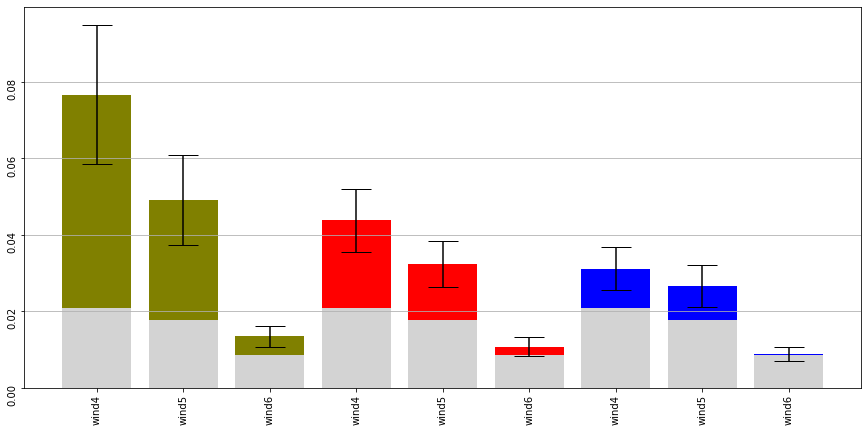

In [70]:
## ResNet models
time_wind = ['wind4', 'wind5', 'wind6', 
             'wind4', 'wind5', 'wind6',
             'wind4', 'wind5', 'wind6']

x_pos = np.arange(len(time_wind))
CTEs = [RGB_ResID_tau_wind4_mean, RGB_ResID_tau_wind5_mean, RGB_ResID_tau_wind6_mean,
        ResUNSUP_tau_wind4_mean, ResUNSUP_tau_wind5_mean, ResUNSUP_tau_wind6_mean,
        ResRL_layer4_tau_wind4_mean, ResRL_layer4_tau_wind5_mean, ResRL_layer4_tau_wind6_mean]


error = [RGB_ResID_tau_wind4_sem, RGB_ResID_tau_wind5_sem, RGB_ResID_tau_wind6_sem,
         ResUNSUP_tau_wind4_sem, ResUNSUP_tau_wind5_sem, ResUNSUP_tau_wind6_sem, 
         ResRL_layer4_tau_wind4_sem, ResRL_layer4_tau_wind5_sem, ResRL_layer4_tau_wind6_sem]

Pixel_value = [KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean,
               KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean,
               KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean]
    

cor_err = ['olive', 'olive', 'olive',
           'red', 'red', 'red', 
           'blue', 'blue', 'blue']

# Build the plot
colors = {'SUP':'olive',
          'UNSUP':'red',
          'RL':'blue'}
    
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colors[label]) for label in labels]

fig, ax = plt.subplots(figsize = (15, 7))
ax.bar(x_pos, CTEs, yerr = error, align = 'center', alpha = 1, label = colors, capsize = 15, color = cor_err)
Pixel_bar = ax.bar(np.arange(len(CTEs)), Pixel_value, color = 'lightgray')

ax.set_xticks(x_pos)
ax.set_xticklabels(time_wind, fontsize = 10)
ax.yaxis.grid(True)

plt.setp(ax.get_xticklabels(), rotation = 90)
plt.setp(ax.get_yticklabels(), rotation = 90)

plt.show()

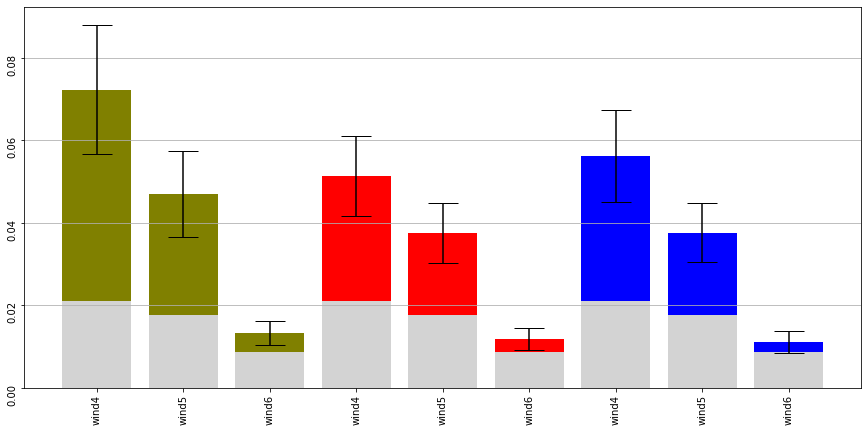

In [71]:
## VIB_DenseNet models
time_wind = ['wind4', 'wind5', 'wind6', 
             'wind4', 'wind5', 'wind6',
             'wind4', 'wind5', 'wind6']

x_pos = np.arange(len(time_wind))
CTEs = [SUP_tau_wind4_mean, SUP_tau_wind5_mean, SUP_tau_wind6_mean,
        UNSUP_tau_wind4_mean, UNSUP_tau_wind5_mean, UNSUP_tau_wind6_mean,
        RL_tau_wind4_mean, RL_tau_wind5_mean, RL_tau_wind6_mean]


error = [SUP_tau_wind4_sem, SUP_tau_wind5_sem, SUP_tau_wind6_sem,
         UNSUP_tau_wind4_sem, UNSUP_tau_wind5_sem, UNSUP_tau_wind6_sem, 
         RL_tau_wind4_sem, RL_tau_wind5_sem, RL_tau_wind6_sem]

Pixel_value = [KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean,
               KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean,
               KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean]
    

cor_err = ['olive', 'olive', 'olive',
           'red', 'red', 'red', 
           'blue', 'blue', 'blue']


# Build the plot
colors = {'SUP':'olive',
          'UNSUP':'red',
          'RL':'blue'}
    

labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colors[label]) for label in labels]

fig, ax = plt.subplots(figsize = (15, 7))
ax.bar(x_pos, CTEs, yerr = error, align = 'center', alpha = 1, label = colors, capsize = 15, color = cor_err)
Pixel_bar = ax.bar(np.arange(len(CTEs)), Pixel_value, color = 'lightgray')

ax.set_xticks(x_pos)
ax.set_xticklabels(time_wind, fontsize = 10)
ax.yaxis.grid(True)

plt.setp(ax.get_xticklabels(), rotation = 90)
plt.setp(ax.get_yticklabels(), rotation = 90)

plt.show()

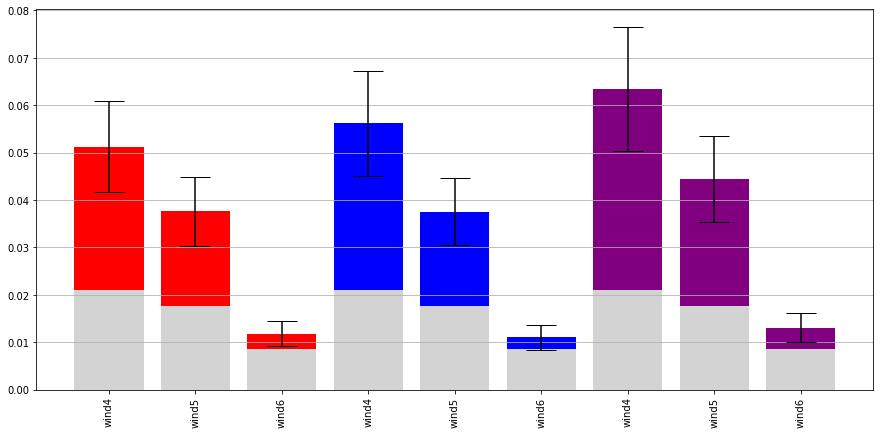

In [75]:
## VIB_DenseNet UNSUP, RL, UNSUP_RL models
time_wind = ['wind4', 'wind5', 'wind6', 
             'wind4', 'wind5', 'wind6',
             'wind4', 'wind5', 'wind6']

x_pos = np.arange(len(time_wind))
CTEs = [UNSUP_tau_wind4_mean, UNSUP_tau_wind5_mean, UNSUP_tau_wind6_mean,
        RL_tau_wind4_mean, RL_tau_wind5_mean, RL_tau_wind6_mean,
        UNSUP_RL_tau_wind4_mean, UNSUP_RL_tau_wind5_mean, UNSUP_RL_tau_wind6_mean]

error = [UNSUP_tau_wind4_sem, UNSUP_tau_wind5_sem, UNSUP_tau_wind6_sem, 
         RL_tau_wind4_sem, RL_tau_wind5_sem, RL_tau_wind6_sem,
         UNSUP_RL_tau_wind4_sem, UNSUP_RL_tau_wind5_sem, UNSUP_RL_tau_wind6_sem]

Pixel_value = [KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean,
               KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean,
               KDEF_tau_wind4_mean, KDEF_tau_wind5_mean, KDEF_tau_wind6_mean]
       
cor_err = ['red', 'red', 'red', 
           'blue', 'blue', 'blue', 
           'purple', 'purple', 'purple']

# Build the plot
colors = {'UNSUP':'red', 
          'RL':'blue', 
          'UNSUP+RL':'purple'}  


labels = list(colors.keys())
handles = [plt.Rectangle((0,0), 1, 1, color = colors[label]) for label in labels]

fig, ax = plt.subplots(figsize = (15, 7))
ax.bar(x_pos, CTEs, yerr = error, align = 'center', alpha = 1, label = colors, capsize = 15, color = cor_err)
Pixel_bar = ax.bar(np.arange(len(CTEs)), Pixel_value, color = 'lightgray')

ax.set_xticks(x_pos)
ax.set_xticklabels(time_wind, fontsize = 10)
ax.yaxis.grid(True)

plt.setp(ax.get_xticklabels(), rotation = 90)

plt.show()

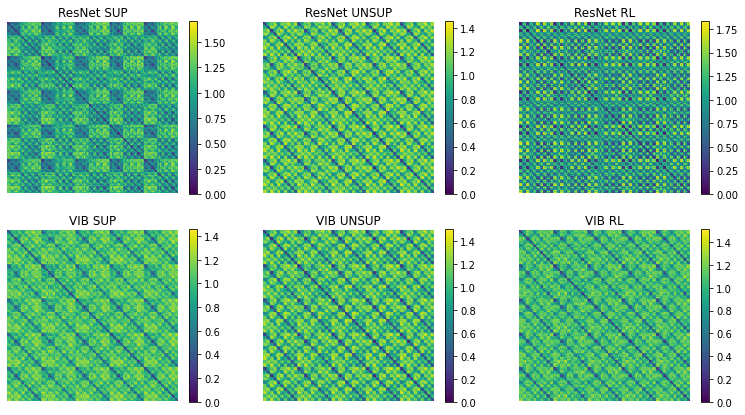

In [7]:
## note that these are model RDMs for KDEF subset A

fig = plt.figure(figsize = (13, 7))
rows = 2
columns = 3
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(RGB_ResID_RDM_value_B)
plt.axis('off')
plt.title("ResNet SUP")
plt.colorbar()

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
plt.imshow(ResUNSUP_RDM_value_B)
plt.axis('off')
plt.title("ResNet UNSUP")
plt.colorbar()

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(ResRL_RDM_value_B)
plt.axis('off')
plt.title("ResNet RL")
plt.colorbar()

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(SUP_RDM_value_B)
plt.axis('off')
plt.title("VIB SUP")
plt.colorbar()

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(UNSUP_RDM_value_B)
plt.axis('off')
plt.title("VIB UNSUP")
plt.colorbar()    
  
# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(RL_RDM_value_B)
plt.axis('off')
plt.title("VIB RL")
plt.colorbar()    

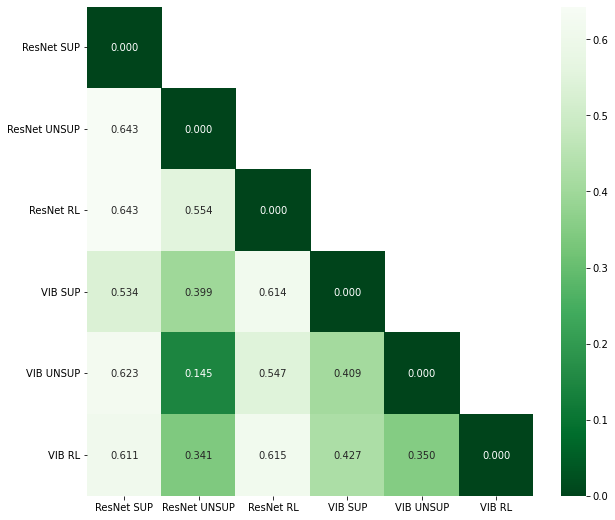

In [8]:
import seaborn as sb

d = {'ResNet SUP':[0, 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_B, v_ResUNSUP_RDM_B)[0], 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_B, v_ResRL_RDM_B)[0],
                   1 - stats.kendalltau(v_RGB_ResID_RDM_B, v_SUP_RDM_B)[0], 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_B, v_UNSUP_RDM_B)[0], 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_B, v_RL_RDM_B)[0]],
     'ResNet UNSUP': [np.nan, 0, 
                      1 - stats.kendalltau(v_ResUNSUP_RDM_B, v_ResRL_RDM_B)[0], 
                      1 - stats.kendalltau(v_ResUNSUP_RDM_B, v_SUP_RDM_B)[0], 
                      1 - stats.kendalltau(v_ResUNSUP_RDM_B, v_UNSUP_RDM_B)[0],
                      1 - stats.kendalltau(v_ResUNSUP_RDM_B, v_RL_RDM_B)[0]],
     'ResNet RL': [np.nan, np.nan, 0, 
                   1 - stats.kendalltau(v_ResRL_RDM_B, v_SUP_RDM_B)[0],
                   1 - stats.kendalltau(v_ResRL_RDM_B, v_UNSUP_RDM_B)[0], 
                   1 - stats.kendalltau(v_ResRL_RDM_B, v_RL_RDM_B)[0]],
     'VIB SUP': [np.nan, np.nan, np.nan, 0, 
                 1 - stats.kendalltau(v_SUP_RDM_B, v_UNSUP_RDM_B)[0],
                 1 - stats.kendalltau(v_SUP_RDM_B, v_RL_RDM_B)[0]],
     'VIB UNSUP': [np.nan, np.nan, np.nan, np.nan, 0, 
                   1 - stats.kendalltau(v_UNSUP_RDM_B, v_RL_RDM_B)[0]],
     'VIB RL': [np.nan, np.nan, np.nan, np.nan, np.nan, 0]}
    
df = pd.DataFrame(data = d, index = ['ResNet SUP', 
                                     'ResNet UNSUP',
                                     'ResNet RL',
                                     'VIB SUP',
                                     'VIB UNSUP',
                                     'VIB RL'])

df.columns = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 
              'VIB SUP', 'VIB UNSUP', 'VIB RL']

s = sb.heatmap(df, cmap = "Greens_r", annot = True, fmt = ".3f")

s.tick_params(axis = 'x', rotation = 0)

plt.gcf().set_size_inches(10, 9)
plt.show()

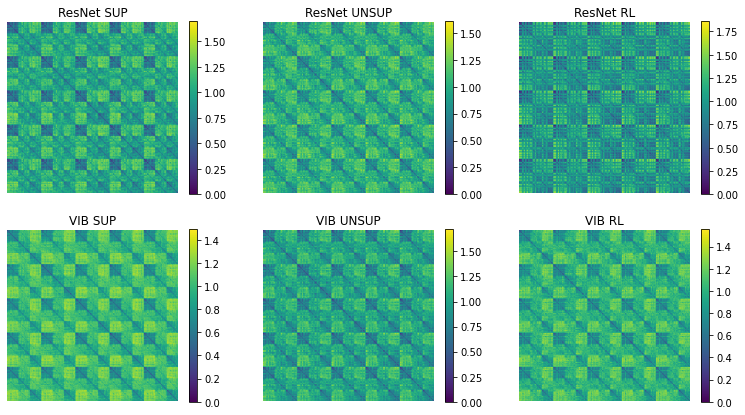

In [9]:
## note that these are model RDMs for KDEF subset B

fig = plt.figure(figsize = (13, 7))
rows = 2
columns = 3
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(RGB_ResID_RDM_value_A)
plt.axis('off')
plt.title("ResNet SUP")
plt.colorbar()

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
plt.imshow(ResUNSUP_RDM_value_A)
plt.axis('off')
plt.title("ResNet UNSUP")
plt.colorbar()

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(ResRL_RDM_value_A)
plt.axis('off')
plt.title("ResNet RL")
plt.colorbar()

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(SUP_RDM_value_A)
plt.axis('off')
plt.title("VIB SUP")
plt.colorbar()

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(UNSUP_RDM_value_A)
plt.axis('off')
plt.title("VIB UNSUP")
plt.colorbar()    
  
# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(RL_RDM_value_A)
plt.axis('off')
plt.title("VIB RL")
plt.colorbar()    

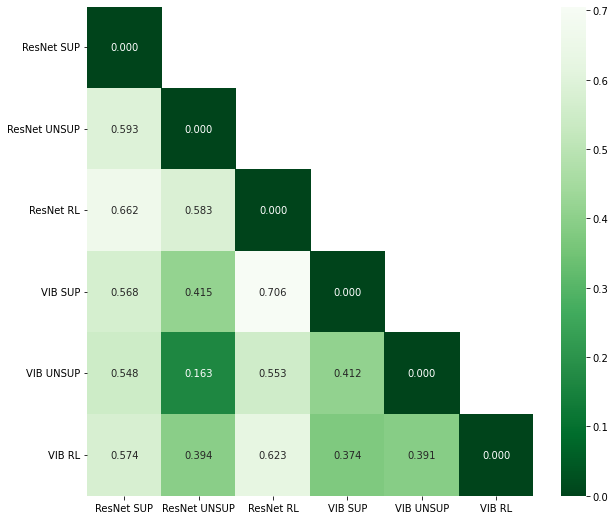

In [10]:
import seaborn as sb

d = {'ResNet SUP':[0, 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_A, v_ResUNSUP_RDM_A)[0], 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_A, v_ResRL_RDM_A)[0],
                   1 - stats.kendalltau(v_RGB_ResID_RDM_A, v_SUP_RDM_A)[0], 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_A, v_UNSUP_RDM_A)[0], 
                   1 - stats.kendalltau(v_RGB_ResID_RDM_A, v_RL_RDM_A)[0]],
     'ResNet UNSUP': [np.nan, 0, 
                      1 - stats.kendalltau(v_ResUNSUP_RDM_A, v_ResRL_RDM_A)[0], 
                      1 - stats.kendalltau(v_ResUNSUP_RDM_A, v_SUP_RDM_A)[0], 
                      1 - stats.kendalltau(v_ResUNSUP_RDM_A, v_UNSUP_RDM_A)[0],
                      1 - stats.kendalltau(v_ResUNSUP_RDM_A, v_RL_RDM_A)[0]],
     'ResNet RL': [np.nan, np.nan, 0, 
                   1 - stats.kendalltau(v_ResRL_RDM_A, v_SUP_RDM_A)[0],
                   1 - stats.kendalltau(v_ResRL_RDM_A, v_UNSUP_RDM_A)[0], 
                   1 - stats.kendalltau(v_ResRL_RDM_A, v_RL_RDM_A)[0]],
     'VIB SUP': [np.nan, np.nan, np.nan, 0, 
                 1 - stats.kendalltau(v_SUP_RDM_A, v_UNSUP_RDM_A)[0],
                 1 - stats.kendalltau(v_SUP_RDM_A, v_RL_RDM_A)[0]],
     'VIB UNSUP': [np.nan, np.nan, np.nan, np.nan, 0, 
                   1 - stats.kendalltau(v_UNSUP_RDM_A, v_RL_RDM_A)[0]],
     'VIB RL': [np.nan, np.nan, np.nan, np.nan, np.nan, 0]}
    
df = pd.DataFrame(data = d, index = ['ResNet SUP', 
                                     'ResNet UNSUP',
                                     'ResNet RL',
                                     'VIB SUP',
                                     'VIB UNSUP',
                                     'VIB RL'])

df.columns = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 
              'VIB SUP', 'VIB UNSUP', 'VIB RL']

s = sb.heatmap(df, cmap = "Greens_r", annot = True, fmt = ".3f")

s.tick_params(axis = 'x', rotation = 0)

# s.tick_params(top = False, labeltop = False, bottom = False, labelbottom = False)

plt.gcf().set_size_inches(10, 9)
plt.show()

In [11]:
ResNet_SUP = torch.tensor([[RGB_ResID_tau_wind4_mean], [RGB_ResID_tau_wind5_mean], [RGB_ResID_tau_wind6_mean]])
ResNet_UNSUP = torch.tensor([[ResUNSUP_tau_wind4_mean], [ResUNSUP_tau_wind5_mean], [ResUNSUP_tau_wind6_mean]])
ResNet_RL = torch.tensor([[ResRL_layer4_tau_wind4_mean], [ResRL_layer4_tau_wind5_mean], [ResRL_layer4_tau_wind6_mean]])

VIB_SUP = torch.tensor([[SUP_tau_wind4_mean], [SUP_tau_wind5_mean], [SUP_tau_wind6_mean]])
VIB_UNSUP = torch.tensor([[UNSUP_tau_wind4_mean], [UNSUP_tau_wind5_mean], [UNSUP_tau_wind6_mean]])
VIB_RL = torch.tensor([[RL_tau_wind4_mean], [RL_tau_wind5_mean], [RL_tau_wind6_mean]])

m_t_ts = torch.transpose(torch.cat((ResNet_SUP, ResNet_UNSUP, ResNet_RL, 
                                    VIB_SUP, VIB_UNSUP, VIB_RL), dim = 1), 0, 1)
m_t_ts

tensor([[0.0767, 0.0492, 0.0135],
        [0.0438, 0.0325, 0.0108],
        [0.0312, 0.0265, 0.0088],
        [0.0723, 0.0470, 0.0133],
        [0.0513, 0.0376, 0.0118],
        [0.0562, 0.0376, 0.0110]], dtype=torch.float64)

In [12]:
from torchmetrics.functional import pairwise_euclidean_distance
pd.DataFrame(pairwise_euclidean_distance(m_t_ts).numpy())

,0,1,2,3,4,5
0,0.000000,0.037014,0.051106,0.004966,0.028040,0.023727
1,0.037014,0.000000,0.014119,0.032054,0.009087,0.013388
2,0.051106,0.014119,0.000000,0.046152,0.023133,0.027449
3,0.004966,0.032054,0.046152,0.000000,0.023080,0.018790
4,0.028040,0.009087,0.023133,0.023080,0.000000,0.005009
5,0.023727,0.013388,0.027449,0.018790,0.005009,0.000000


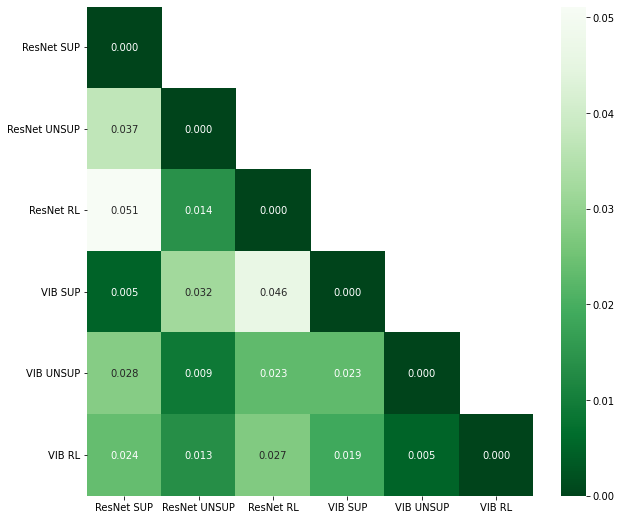

In [13]:
rev_m_t_dist = pd.DataFrame(pairwise_euclidean_distance(m_t_ts).numpy())
m,n = rev_m_t_dist.shape
rev_m_t_dist[:] = np.where(np.arange(m)[:,None] < np.arange(n),np.nan,rev_m_t_dist)
temp = rev_m_t_dist

temp = temp.set_axis(['ResNet SUP', 'ResNet UNSUP', 'ResNet RL',
                      'VIB SUP', 'VIB UNSUP', 'VIB RL'])

temp.columns = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 
                'VIB SUP', 'VIB UNSUP', 'VIB RL']

s = sb.heatmap(temp, cmap = "Greens_r", annot = True, fmt = ".3f")
s.tick_params(axis = 'x', rotation = 0)
# s.tick_params(top = False, labeltop = False, bottom = False, labelbottom = False)
plt.gcf().set_size_inches(10, 9)
plt.show()

In [14]:
e_56 = np.array([0.00047, 0, 0, 0, 0, 0, 0.00173, 0, 0, 
                 0, 0, 0, 0, 0, 0, 0, 0.00128, 0.00034])
e_39 = np.array([0, 0, 0, 0.00054, 0, 0, 0.00090, 0, 0, 
                 0, 0, 0, 0.00061, 0, 0, 0, 0, 0])
e_90 = np.array([0.04772, 0.02721, 0.00874, 0.03303, 0.02456, 0.00978, 0.03870, 0.02228, 0.00715, 
                 0.02989, 0.02105, 0.01001, 0.03131, 0.02357, 0.00890, 0.01209, 0.01652, 0.00814])
e_100 = np.array([0.05333, 0.03303, 0.00854, 0.04776, 0.02777, 0.01078, 0.05108, 0.03120, 0.01040, 
                  0.04922, 0.03110, 0.00856, 0.04209, 0.02510, 0.01003, 0.03236, 0.01992, 0.00900])
e_53 = np.array([0.06170, 0.08556, 0.04711, 0.05534, 0.07529, 0.04230, 0.05754, 0.08037, 0.04018, 
                 0.05226, 0.07871, 0.04834, 0.04936, 0.06445, 0.03707, 0.03469, 0.05260, 0.02335])
e_60 = np.array([0.03000, 0.03997, 0.00695, 0.02213, 0.03346, 0.00768, 0.02814, 0.03350, 0.00629,  
                 0.01698, 0.03395, 0.01217, 0.02082, 0.02916, 0.00572, 0.00836, 0.02151, 0.00440])
e_61 = np.array([0.01536, 0.05705, 0.02454, 0.01229, 0.04293, 0.02410, 0.01209, 0.05340, 0.02197,  
                 0.01399, 0.04477, 0.02776, 0.01069, 0.03836, 0.01949, 0.00585, 0.03344, 0.01672])
e_62 = np.array([0.04406, 0.04310, 0.03693, 0.04404, 0.04711, 0.03284, 0.04432, 0.04972, 0.02828, 
                 0.04474, 0.04302, 0.02911, 0.04045, 0.04325, 0.02935, 0.04149, 0.04462, 0.01622])
e_85 = np.array([0.04131, 0.00655, 0.00446, 0.04674, 0.00940, 0.00587, 0.03947, 0.00915, 0.00524, 
                 0.04391, 0.00847, 0.00591, 0.03766, 0.00952, 0.00434, 0.03958, 0.00598, 0.00285])
e_8 = np.array([0, 0.00053, 0, 0, 0.00006, 0.00136, 0, 0.00203, 0, 
                0, 0.00210, 0.00188, 0, 0, 0.00063, 0.00014, 0.00024, 0.00082])
e_23 = np.array([0, 0.00157, 0, 0, 0.00137, 0, 0, 0.00115, 0, 
                 0.00084, 0.00275, 0, 0, 0.00157, 0, 0, 0.00217, 0])
e_42 = np.array([0.01819, 0.00551, 0.00082, 0.01898, 0.00582, 0.00282, 0.01821, 0.00581, 0.00177, 
                 0.01549, 0.00662, 0.00324, 0.01809, 0.00461, 0.00335, 0.02580, 0.00539, 0.00218])
e_43 = np.array([0.08086, 0.02782, 0.00443, 0.07931, 0.04045, 0.00644, 0.07490, 0.02560, 0.00410, 
                 0.08264, 0.03902, 0.00238, 0.06344, 0.03111, 0.00587, 0.05773, 0.03848, 0.00606])
e_44 = np.array([0.02710, 0.01704, 0.00202, 0.02323, 0.01989, 0.00437, 0.02302, 0.01564, 0.00271, 
                 0.02644, 0.01829, 0.00187, 0.01984, 0.01755, 0.00384, 0.01389, 0.01963, 0.00481])
e_64 = np.array([0.12221, 0.07929, 0.04553, 0.10808, 0.08038, 0.04543, 0.09888, 0.06915, 0.04561, 
                 0.08886, 0.07497, 0.04092, 0.09297, 0.06632, 0.04224, 0.04722, 0.04273, 0.03047])
e_69 = np.array([0.00492, 0.00672, 0.00988, 0.00303, 0.00443, 0.00685, 0.00241, 0.00577, 0.00752, 
                 0.00386, 0.00535, 0.00718, 0.00250, 0.00352, 0.00750, 0.00063, 0.00194, 0.00476])
e_70 = np.array([0.00274, 0.00672, 0.00357, 0.00194, 0.00443, 0.00164, 0.00145, 0.00577, 0.00283, 
                 0, 0.00535, 0.00501, 0.00210, 0.00352, 0.00228, 0, 0.00194, 0.00230])
e_10 = np.array([0.27575, 0.21374, 0.03103, 0.15424, 0.13861, 0.02674, 0.18190, 0.13673, 0.03046, 
                 0.30796, 0.24969, 0.02074, 0.13380, 0.11279, 0.02702, 0.08867, 0.10780, 0.00470])
e_11 = np.array([0.17604, 0.11470, 0.00984, 0.09640, 0.07394, 0.01051, 0.12122, 0.07178, 0.00692, 
                 0.22687, 0.12428, 0.01411, 0.07808, 0.06191, 0.01127, 0.05670, 0.04965, 0.01659])
e_12 = np.array([0.08977, 0.04539, 0.01927, 0.05073, 0.02611, 0.01730, 0.06150, 0.03233, 0.00672,
                 0.11613, 0.03317, 0.02136, 0.03825, 0.02723, 0.01606, 0.02712, 0.00798, 0.03084])
e_2 = np.array([0.15774, 0.08305, 0.00929, 0.10287, 0.05405, 0.00158, 0.11894, 0.06092, 0.00214, 
                0.17389, 0.07843, 0.00553, 0.08823, 0.04471, 0.00056, 0.06641, 0.02837, 0.00729])
e_24 = np.array([0.10769, 0.03302, 0.00837, 0.07246, 0.03485, 0.00629, 0.07803, 0.03755, 0.00926,
                 0.11872, 0.04593, 0.01717, 0.06374, 0.03520, 0.00630, 0.04000, 0.01457, 0.01112])
e_9 = np.array([0.20987, 0.11719, 0.02061, 0.13474, 0.08611, 0.00941, 0.15847, 0.07579, 0.01646, 
                0.23081, 0.11799, 0.02603, 0.11414, 0.07774, 0.00772, 0.07582, 0.07674, 0.00295])
e_34 = np.array([0.16781, 0.08401, 0.01793, 0.12257, 0.07135, 0.00920, 0.13626, 0.07587, 0.00826,
                 0.19803, 0.11646, 0.01365, 0.10367, 0.05854, 0.00878, 0.07360, 0.04334, 0.00569])

In [15]:
# ## save
# path = "/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/LDA_input/"
# x = np.array([e_90, e_69, e_70, e_53, e_60, e_61, e_62, e_8, 
#               e_85, e_64, e_2, e_9, e_10, e_11, e_12, e_24, e_34, e_100, e_44, e_39])
# with open(path + 'NOV_30_LDA_input.pkl', 'wb') as pickle_out:
#      pickle.dump(x, pickle_out)      
LDA_input = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/LDA_input/NOV_30_LDA_input.pkl', "rb"))

In [16]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/LDA_input/NOV_30_LDA_input.pkl', "rb")) ## only have two classes (lateral and ventral)
y = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

loo = LeaveOneOut()

# logistic regression classifier
clf = LogisticRegression(class_weight = 'balanced') ## after adjusting class weights

y_pred = []
for train_index, test_index in loo.split(X):
    X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

    clf.fit(X_train, y_train)
    
    y_pred.append(clf.predict(X_test)[0])

accuracy = accuracy_score(y, y_pred)
print("Classification accuracy:", accuracy) ## after adjusting class weights

Classification accuracy: 0.75


In [17]:
## VIB_SUP, VIB_UNSUP, VIB_RL, ResNet_SUP, ResNet_UNSUP, ResNet_RL
clf.coef_

array([[ 0.44202902,  0.16698099, -0.00902144,  0.28138033,  0.1096353 ,
        -0.01361234,  0.31528714,  0.09571001, -0.0085077 ,  0.52599942,
         0.21187571, -0.01076816,  0.23116794,  0.09198552, -0.00851204,
         0.16326221,  0.06187263,  0.0082363 ]])

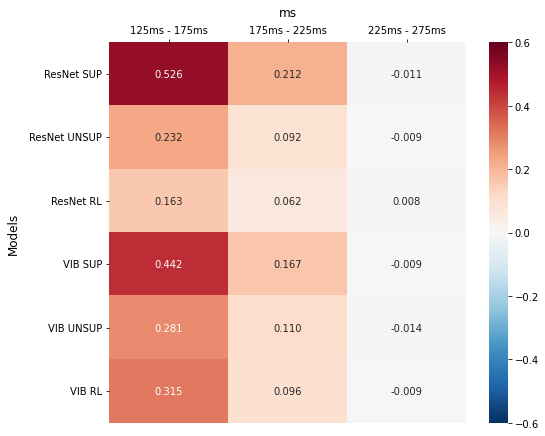

In [18]:
import seaborn as sb

## ResNet_SUP, ResNet_UNSUP, ResNet_RL, VIB_SUP, VIB_UNSUP, VIB_RL, 
d = {'125ms - 175ms': [0.5260, 0.2317, 0.1633, 0.4420, 0.2814, 0.3153],
     '175ms - 225ms': [0.2119, 0.0920, 0.0619, 0.1670, 0.1096, 0.0957],
     '225ms - 275ms': [-0.0108, -0.0085, 0.0082, -0.0090, -0.0136, -0.0085]}
df = pd.DataFrame(data = d, index = ['ResNet SUP', 'ResNet UNSUP', 'ResNet RL', 'VIB SUP', 'VIB UNSUP', 'VIB RL'])

s = sb.heatmap(df, cmap = "RdBu_r", annot = True, fmt = ".3f", vmin = -0.6, vmax = 0.6)

s.tick_params(top = True, labeltop = True, bottom = False, labelbottom = False)
s.set_xlabel("ms", fontsize = 12, labelpad = 9)
s.xaxis.set_label_position('top')
s.set_ylabel("Models", fontsize = 12, labelpad = 9)
plt.gcf().set_size_inches(8, 7)
plt.show()

In [19]:
# path = "/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/PCA_input/"
# x = np.array([e_90, e_100, e_53, e_60, e_61, e_62, e_85, e_8, e_44, e_64, e_69, e_70, 
#               e_10, e_11, e_12, e_2, e_24, e_9, e_34, e_39])
# with open(path + 'NOV_30_PCA_plot_input.pkl', 'wb') as pickle_out:
#      pickle.dump(x, pickle_out)      

PCA_input = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/PCA_input/NOV_30_PCA_plot_input.pkl', "rb"))
PCA_input = torch.from_numpy(PCA_input)
## 0 = Lateral, 1 = Ventral
col_brain_area = np.array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]) 
color_dict = np.array(['Lateral','Ventral'])

pca, _, _ = torch.pca_lowrank(PCA_input, q = 3)  

In [20]:
from sklearn.linear_model import LogisticRegression
X_pc = pca
y_pc = np.array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]) 

logr_pc = LogisticRegression(class_weight = 'balanced') ## after adjusting class weights
logr_pc.fit(X_pc, y_pc)

logr_pc.coef_

array([[ 0.98591103,  0.91176824, -0.424932  ]])

/data/zhouabx/.local/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


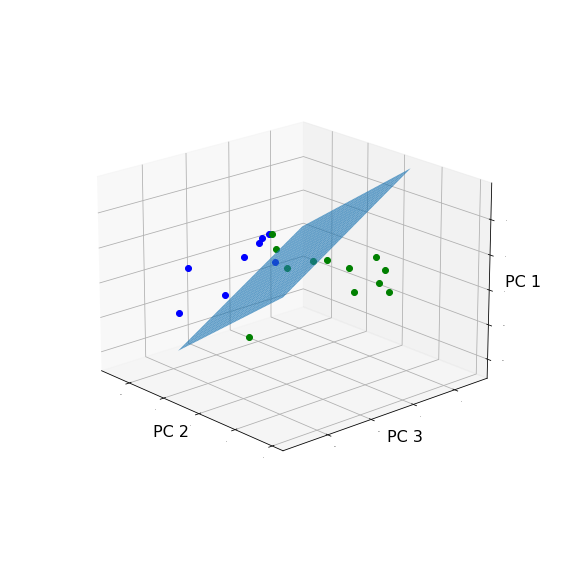

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

z = lambda x,y: (-logr_pc.intercept_[0]-logr_pc.coef_[0][0]*x-logr_pc.coef_[0][1]*y) / logr_pc.coef_[0][2]

tmp = np.linspace(-0.3, 0.3, 51)
x,y = np.meshgrid(tmp, tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, z(x, y), alpha = 0.7)

ax.plot3D(X_pc[y_pc==0,0], X_pc[y_pc==0,1], X_pc[y_pc==0,2],'ob', color = "blue")
ax.plot3D(X_pc[y_pc==1,0], X_pc[y_pc==1,1], X_pc[y_pc==1,2],'ob', color = "green")
ax.azim = -42
ax.dist = 13
ax.elev = 20

ax.set_xlabel('PC 2', fontsize = 16)
ax.set_ylabel('PC 3', fontsize = 16)
ax.set_zlabel('PC 1', fontsize = 16)
ax.tick_params(axis = 'x', labelsize = 0)
ax.tick_params(axis = 'y', labelsize = 0)
ax.tick_params(axis = 'z', labelsize = 0)

plt.rcParams['figure.figsize'] = [10, 15]
plt.show()

In [52]:
model_RDMs = {
    'VIB SUP': pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb")),
    'VIB UNSUP': pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb")),
    'VIB RL': pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/KDEF_test_results_AB/RDM_value_A.pkl',"rb")),
    'ResNet SUP': pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/RDM_value_A.pkl',"rb")),
    'ResNet UNSUP': pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/KDEF_test_results_AB/RDM_value_A.pkl',"rb")),
    'ResNet RL': pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/KDEF_test_results_AB/NOV_RDM_value_A.pkl',"rb")),
}

## VIB_DenseNet
VIB_SUP = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/SUP/SUP_ttest_df/SUP.pkl', "rb"))
VIB_UNSUP = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/UNSUP/UNSUP_ttest_df/UNSUP.pkl', "rb"))
VIB_RL = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/RL_ttest_df/RL.pkl', "rb"))

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(model)', data = pd.concat([VIB_SUP, VIB_UNSUP, VIB_RL])).fit()
result = sm.stats.anova_lm(model, type = 2)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(model),2.0,0.004838,0.002419,1.097592,0.335553
Residual,213.0,0.469433,0.002204,NaN,NaN


In [53]:
## ResNet
ResNet_SUP = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_gender/id/RGB_KDEF_test_results_AB/RGB_ResID_ttest_df/RGB_ResID.pkl', "rb"))
ResNet_UNSUP = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNet_UNSUP/ResUNSUP_ttest_df/ResUNSUP.pkl', "rb"))
ResNet_RL = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/ResRL_ttest_df/ResRL.pkl', "rb"))

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(model)', data = pd.concat([ResNet_SUP, ResNet_UNSUP, ResNet_RL])).fit()
result = sm.stats.anova_lm(model, type = 2)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(model),2.0,0.022598,0.011299,5.62559,0.004161
Residual,213.0,0.427809,0.002008,NaN,NaN


In [54]:
ResNet_RL = pickle.load(open('/mmfs1/data/zhouabx/ResNet-18/ResNetRL/ResRL_ttest_df/ResRL.pkl', "rb"))
VIB_RL = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/RL/RL_ttest_df/RL.pkl', "rb"))

## ResNet RL and VIB RL
ResVIB_RL_diff_values = ResNet_RL.groupby('subject').mean().iloc[:, 0] - VIB_RL.groupby('subject').mean().iloc[:, 0]
## this is the average difference value averaging across eletrodes and time windows for each participant
ResVIB_RL_values = ResVIB_RL_diff_values.values.tolist()
stats.ttest_1samp(ResVIB_RL_values, 0)

Ttest_1sampResult(statistic=-2.5649332210649223, pvalue=0.030439768754174177)

In [55]:
ANOVA_input = pd.read_csv("/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/ANOVA_input/ANOVA_1130.csv").iloc[:, :-1]
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Correlation ~ C(Time_window) * C(Brain_region) * C(Model_type)', data = ANOVA_input).fit()
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Time_window),0.142663,2.0,48.696034,3.229252e-19
C(Brain_region),0.081992,1.0,55.973683,6.966928e-13
C(Model_type),0.035698,5.0,4.873967,2.585573e-04
C(Time_window):C(Brain_region),0.072939,2.0,24.896647,8.749588e-11
C(Time_window):C(Model_type),0.016662,10.0,1.137445,3.333941e-01
C(Brain_region):C(Model_type),0.012785,5.0,1.745557,1.237755e-01
C(Time_window):C(Brain_region):C(Model_type),0.010904,10.0,0.744394,6.823759e-01
Residual,0.474606,324.0,NaN,NaN


In [76]:
## VIB_DenseNet RL and UNSUP_RL model getting reward
reward_before_training = np.array([0.30893, 0.79199, 0.46685, 0.50281, 0.61271, 0.39978, 0.53498, 0.46470, 0.49888, 0.42174])
reward_after_training = np.array([10.77228, 10.09497, 9.79302, 11.33942, 11.03821, 10.60554, 11.24973, 10.84988, 9.53517, 11.42878])
reward_before_training_mean = np.mean(reward_before_training)
reward_after_training_mean = np.mean(reward_after_training)
reward_before_training_sem = sem(reward_before_training)
reward_after_training_sem = sem(reward_after_training)

combined_before_training = np.array([-0.34555, -0.03381, -0.45433, -0.27874, -0.49293, -0.48626, -0.36149, -0.37735, -0.32151, -0.23593])
combined_after_training = np.array([7.09142, 8.09178, 8.37205, 7.33075, 8.12522, 6.88389, 6.50296, 6.69213, 6.53975, 7.02060])
combined_before_training_mean = np.mean(combined_before_training)
combined_after_training_mean = np.mean(combined_after_training)
combined_before_training_sem = sem(combined_before_training)
combined_after_training_sem = sem(combined_after_training)

In [77]:
## reward model
stats.ttest_ind(reward_before_training, reward_after_training)

Ttest_indResult(statistic=-47.74174574832991, pvalue=2.0718041940245795e-20)

In [78]:
## combined model
stats.ttest_ind(combined_before_training, combined_after_training)  

Ttest_indResult(statistic=-34.03642876444765, pvalue=8.579912837345214e-18)

In [79]:
reward_diff = reward_after_training - reward_before_training
combined_diff = combined_after_training - combined_before_training
stats.ttest_ind(reward_diff, combined_diff)  

Ttest_indResult(statistic=8.22076114284615, pvalue=1.6595526573620736e-07)

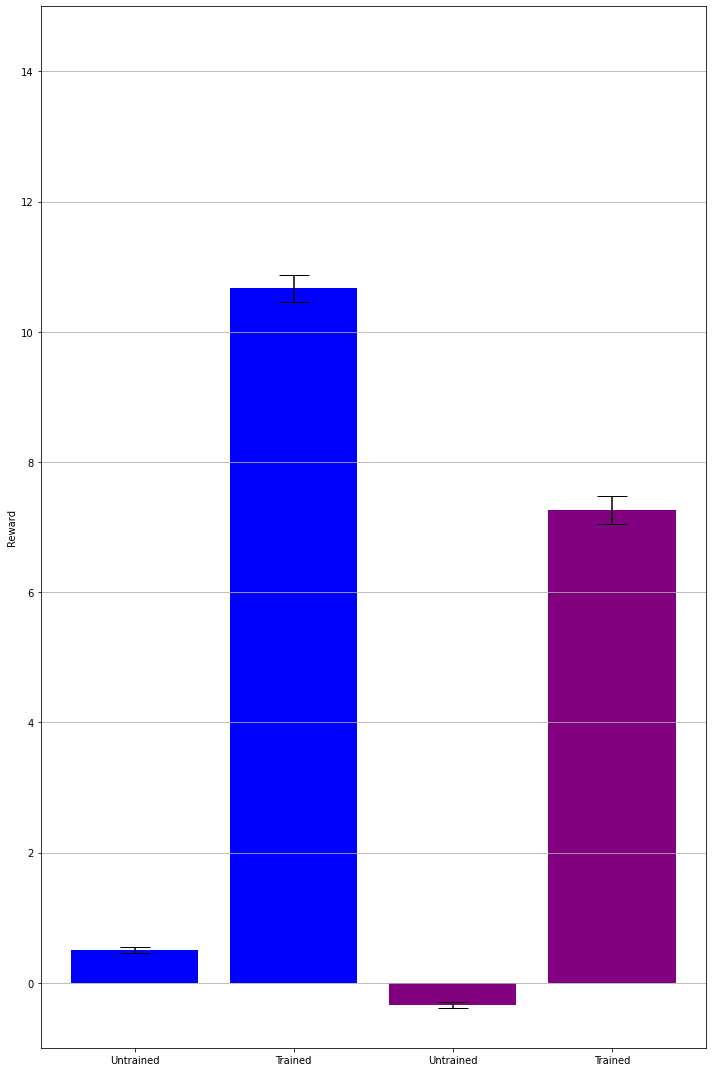

In [81]:
# Create lists for the plot
Models = ['Untrained', 'Trained', 'Untrained', 'Trained']
x_pos = np.arange(len(Models))
CTEs = [reward_before_training_mean, reward_after_training_mean, combined_before_training_mean, combined_after_training_mean]
error = [reward_before_training_sem, reward_after_training_sem, combined_before_training_sem, combined_after_training_sem]

cor_err = ['blue', 'blue', 'purple', 'purple']

# Build the plot
colors = {'reward only model':'blue', 'combined model':'purple'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr = error, align = 'center', alpha = 1, label = colors, capsize = 15, color = cor_err)

ax.set_ylabel('Reward', fontsize = 10)
ax.set_xticks(x_pos)
ax.set_xticklabels(Models, fontsize = 10)
# ax.set_title('Get reward')
ax.yaxis.grid(True)
# ax.legend(handles, labels)

plt.tight_layout()
plt.ylim(-1, 15)
plt.show()

In [65]:
## ResNet RL model getting reward
ResNetRL_before_training = np.array([-0.14233, -0.26767, -0.14898, -0.44206, -0.40946, -0.21477, -0.28873, -0.27710, -0.20836, -0.14888, ])
ResNetRL_after_training = np.array([12.69023, 12.46616, 12.65821, 12.54338, 12.50621, 12.36732, 12.63439, 12.72428, 12.55724, 12.89392])
ResNetRL_before_training_mean = np.mean(ResNetRL_before_training)
ResNetRL_after_training_mean = np.mean(ResNetRL_after_training)
ResNetRL_before_training_sem = sem(ResNetRL_before_training)
ResNetRL_after_training_sem = sem(ResNetRL_after_training)

In [66]:
## ResNetRL model
stats.ttest_ind(ResNetRL_before_training, ResNetRL_after_training)

Ttest_indResult(statistic=-222.76629042548896, pvalue=2.0095112625331983e-32)

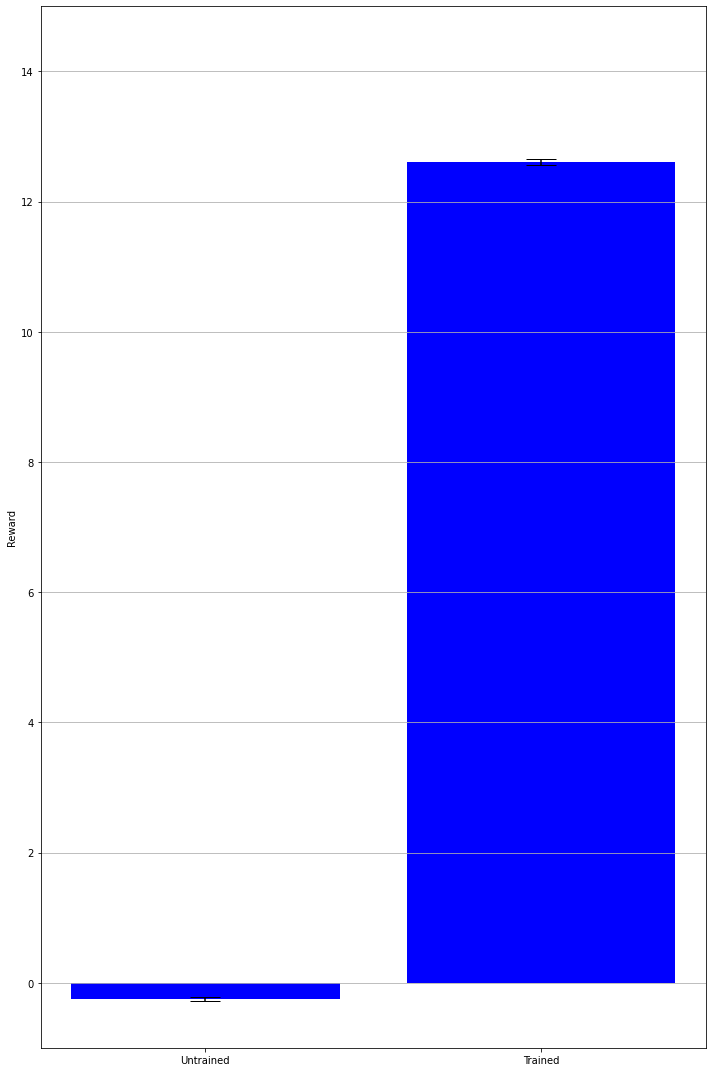

In [67]:
# Create lists for the plot
Models = ['Untrained', 'Trained']
x_pos = np.arange(len(Models))
CTEs = [ResNetRL_before_training_mean, ResNetRL_after_training_mean]
error = [ResNetRL_before_training_sem, ResNetRL_after_training_sem]

cor_err = ['blue', 'blue']

# Build the plot
colors = {'reward only model':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr = error, align = 'center', alpha = 1, label = colors, capsize = 15, color = cor_err)

ax.set_ylabel('Reward', fontsize = 10)
ax.set_xticks(x_pos)
ax.set_xticklabels(Models, fontsize = 10)
# ax.set_title('Get reward')
ax.yaxis.grid(True)
# ax.legend(handles, labels)

plt.tight_layout()
plt.ylim(-1, 15)
plt.show()